#**Solar Vision Project Flow**
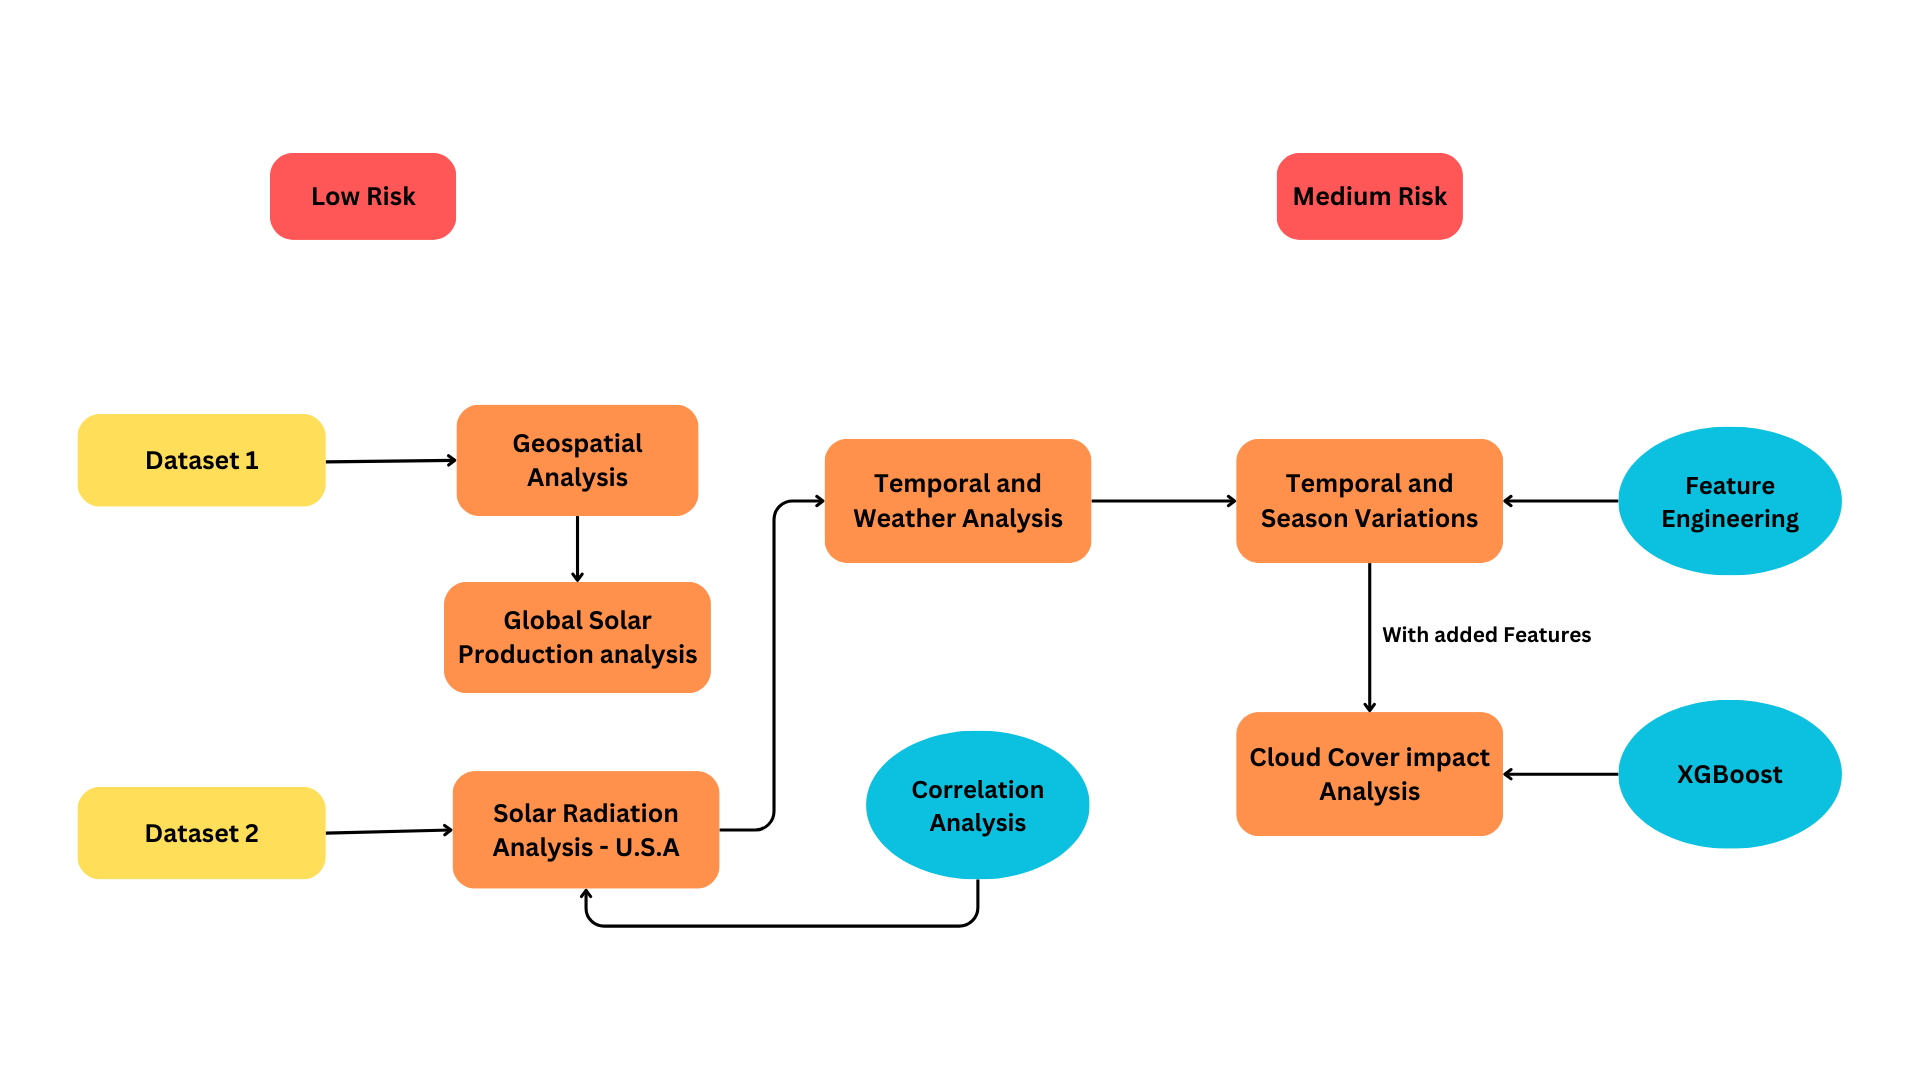

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

# New Section

In [ ]:
import os
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%reload_ext autoreload
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

## **Dataset 1: Identifying largest global solar producers**

In [ ]:
df_global = pd.read_excel('/content/drive/MyDrive/global_solar_production.xlsx')

### **Cleaning**

In [ ]:
new_column_names = {'Gen': 'Gen(TWh)', '%': '% gen', 'Cap.':'Cap.(GW)', '% cap.':'% cap.growth','Cap..1':'Cap.fac.'}
df_global.rename(columns=new_column_names, inplace=True)
df_world = df_global.iloc[2:]
df_global = df_global.iloc[3:]
df_global['Country'] = df_global['Country'].str.replace(r'\s?\(\d+\)?', '', regex=True)
df_global

,Country,Gen(TWh),% gen,Cap.(GW),% cap.growth,Cap.fac.
3,China,427.72,4.8,393.03,28,0.12
4,United States,205.08,4.8,113.02,18.5,0.21
5,Japan,102.4,9.9,83.06,5.9,0.14
6,India,95.16,5.1,63.19,27.1,0.17
7,Germany,60.01,10.7,66.66,12.3,0.1
...,...,...,...,...,...,...
94,Mongolia,0.14,1.9,0.09,0,0.18
95,Bosnia and Herzegovina,0.14,0.9,0.11,83.3,0.15
96,Burkina Faso,0.12,6.9,0.06,20,0.23
97,Lebanon,0.12,0.6,0.19,111.1,0.07


In [ ]:
columns_to_convert = ['Gen(TWh)', '% gen', 'Cap.(GW)', '% cap.growth', 'Cap.fac.']
df_global[columns_to_convert] = df_global[columns_to_convert].astype(float)

**Country:** The name of the country.


**Gen(TWh):** Generation of electricity in terawatt-hours (TWh).
Total electricity generation from solar power in terawatt-hours (TWh). This would represent the overall solar production of each country.

**% gen:** Percentage of electricity generation.
Percentage of electricity generation from solar power. This could provide insight into the share of solar energy in the overall electricity generation of each country.

**Cap.(GW):** Installed capacity in gigawatts (GW).
Installed capacity of solar power in gigawatts (GW). This measures the maximum potential output of solar power in each country.

**% cap.growth:**  Percentage of capacity growth.
Percentage growth in installed capacity. This could indicate how rapidly a country is expanding its solar infrastructure.

**Cap.fac.:** Capacity factor. This represents the ratio of the actual electricity generated by a solar power plant to the maximum possible generation, providing an efficiency measure.



In [ ]:
column_to_rank = 'Gen(TWh)'
top_10 = df_global.nlargest(10, column_to_rank)
top_10

,Country,Gen(TWh),% gen,Cap.(GW),% cap.growth,Cap.fac.
3,China,427.72,4.8,393.03,28.0,0.12
4,United States,205.08,4.8,113.02,18.5,0.21
5,Japan,102.40,9.9,83.06,5.9,0.14
6,India,95.16,5.1,63.19,27.1,0.17
7,Germany,60.01,10.7,66.66,12.3,0.10
8,Australia,38.84,14.2,29.68,15.2,0.15
9,Spain,32.83,11.5,20.52,28.1,0.18
10,South Korea,29.09,4.8,24.08,13.3,0.14
11,Italy,27.73,9.7,25.08,11.0,0.13
12,Brazil,26.48,3.9,24.08,69.6,0.13


###**Visualizations**

In [ ]:
#Bar plot
fig = px.bar(top_10, x='Country', y=column_to_rank, labels={'Country': 'Country', column_to_rank: f'Solar Potential ({column_to_rank})'},
             title=f'Solar Potential by Country ({column_to_rank}) Top-10')
fig.update_layout(xaxis=dict(tickangle=45))

fig.show()

In [ ]:
#Scatter Plot
import plotly.express as px

scatter_fig = px.scatter(df_global, x='Gen(TWh)', y='Cap.(GW)', color='Country', size='Cap.fac.',
                         labels={'Gen(TWh)': 'Electricity Generation (TWh)', 'Cap.(GW)': 'Installed Capacity (GW)'},
                         title='Scatter Plot: Electricity Generation vs Installed Capacity')
scatter_fig.show()


In [ ]:
#line Graph
line_fig = px.line(df_global, x='Country', y='Gen(TWh)',
                   labels={'Gen(TWh)': 'Electricity Generation (TWh)'},
                   title='Line Chart: Electricity Generation by Country')
line_fig.show()

In [ ]:
pie_fig = px.pie(top_10, names='Country', values='Cap.fac.',
                 labels={'Cap.fac.': 'Capacity Factor'},
                 title='Pie Chart: Capacity Factor by Country')
pie_fig.show()


##**Dataset 2: Solar Radiation Analysis**

###**Merging all the files internally - All the years**


In [ ]:
# As of now all files merged! Do not rerun this!

folder_path = '/content/drive/MyDrive/NSRD_data/Honolulu'

csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

merged_data = pd.DataFrame()


for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    merged_data = pd.concat([merged_data, df], ignore_index=True)

merged_data.to_csv('/content/drive/MyDrive/Merged_files/Honolulu.csv', index=False)

print("CSV files merged successfully!")


CSV files merged successfully!


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Merged_files/Denver.csv', header=0)
# df

###**Merging files for each City with Data Cleaning**

In [ ]:
import pandas as pd

merged_df = pd.DataFrame()

csv_files = [
    '/content/drive/MyDrive/Merged_files/Albuquerque.csv',
    '/content/drive/MyDrive/Merged_files/Burlington.csv',
    '/content/drive/MyDrive/Merged_files/Charleston.csv',
    '/content/drive/MyDrive/Merged_files/Chicago.csv',
    '/content/drive/MyDrive/Merged_files/Denver.csv',
    '/content/drive/MyDrive/Merged_files/Hartford.csv',
    '/content/drive/MyDrive/Merged_files/Honolulu.csv',
    '/content/drive/MyDrive/Merged_files/Indianapolis.csv',
    '/content/drive/MyDrive/Merged_files/LasAngeles.csv',
    '/content/drive/MyDrive/Merged_files/LasVages.csv',
    '/content/drive/MyDrive/Merged_files/NewOrleans.csv',
    '/content/drive/MyDrive/Merged_files/Newark.csv',
    '/content/drive/MyDrive/Merged_files/Phoenix.csv',
    '/content/drive/MyDrive/Merged_files/Riverside.csv',
    '/content/drive/MyDrive/Merged_files/Sacramento.csv',
    '/content/drive/MyDrive/Merged_files/SaltLakeCity.csv',
    '/content/drive/MyDrive/Merged_files/SanAntonio.csv',
    '/content/drive/MyDrive/Merged_files/SanDiego.csv',
    '/content/drive/MyDrive/Merged_files/SanJose.csv',
    '/content/drive/MyDrive/Merged_files/Washington.csv'
]

for csv_file in csv_files:
    city_df = pd.read_csv(csv_file, low_memory=False)



    latitude = city_df['Latitude'][0]
    longitude = city_df['Longitude'][0]


    city_df['Latitude'] = latitude
    city_df['Longitude'] = longitude

    # Drop the 0th row
    city_df = city_df.drop(0)

    # Reset the index and drop the old index column
    city_df = city_df.reset_index(drop=True)

    # Set the column names to the values in the 0th row
    city_df.columns = city_df.iloc[0]

    # Drop the 0th row (since it's now the header)
    city_df = city_df[1:]

    # Rename the columns
    city_df = city_df.rename(columns={city_df.columns[5]: 'Latitude', city_df.columns[6]: 'Longitude'})

    merged_df = pd.concat([merged_df, city_df])

merged_df.to_csv('/content/drive/MyDrive/Merged_files/merged_df.csv', index=False)
print("CSV files merged successfully!")

CSV files merged successfully!




```
# This is formatted as code
```

###**More Data Cleaning**

In [ ]:
# merged_df = pd.read_csv('/content/drive/MyDrive/Merged_files/merged_df.csv')

In [ ]:
# Unwanted data
merged_df = merged_df[merged_df['Year'] != 'NSRDB']
merged_df = merged_df[merged_df['Year'] != 'Year']
merged_df = merged_df[merged_df['Year'] != 2019]

# Convert column names to strings
merged_df.columns = merged_df.columns.astype(str)

# Dropping columns with NaN as column names
merged_df = merged_df.loc[:, ~merged_df.columns.str.contains('^nan')]

# Dropping columns where all values are NaN
merged_df = merged_df.dropna(axis=1, how='all')

merged_df.to_csv('/content/drive/MyDrive/Merged_files/merged_df.csv', index=False)
print("CSV files merged successfully!")

CSV files merged successfully!


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Merged_files/merged_df.csv')

In [ ]:
df

,Year,Month,Day,Hour,Minute,Latitude,Longitude,Clearsky DHI,Clearsky DNI,Clearsky GHI,...,Fill Flag,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
0,2022,1,1,0,0,35.08,-106.65,0,0,0,...,0,0,0.270,86.54,167.72,0.65,830,1.2,242,3.9
1,2022,1,1,1,0,35.08,-106.65,0,0,0,...,0,0,0.269,87.82,163.74,0.65,831,1.1,247,3.0
2,2022,1,1,2,0,35.08,-106.65,0,0,0,...,0,0,0.270,88.94,153.23,0.65,831,1.1,241,2.2
3,2022,1,1,3,0,35.08,-106.65,0,0,0,...,0,0,0.272,88.09,141.27,0.65,831,1.1,232,2.3
4,2022,1,1,4,0,35.08,-106.65,0,0,0,...,0,0,0.275,81.12,129.02,0.65,831,1.1,230,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700795,2019,12,31,19,0,38.90,-77.03,0,0,0,...,0,0,0.233,97.91,113.38,0.14,1012,3.6,169,2.7
700796,2019,12,31,20,0,38.90,-77.03,0,0,0,...,0,0,0.232,98.05,124.94,0.14,1011,3.6,171,2.8
700797,2019,12,31,21,0,38.90,-77.03,0,0,0,...,0,0,0.230,97.91,136.59,0.14,1010,3.7,185,3.3
700798,2019,12,31,22,0,38.90,-77.03,0,0,0,...,0,0,0.227,97.98,147.93,0.14,1009,3.9,195,3.9


In [ ]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Latitude', 'Longitude',
       'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',
       'Dew Point', 'DNI', 'Fill Flag', 'GHI', 'Ozone', 'Relative Humidity',
       'Solar Zenith Angle', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed'],
      dtype='object')

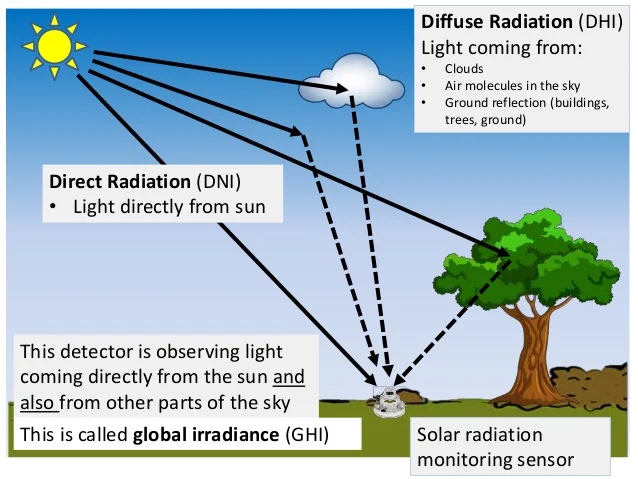

In [ ]:
unique_counts = df.nunique()
print(unique_counts)


Year                      4
Month                    12
Day                      31
Hour                     24
Minute                    1
Latitude                 20
Longitude                20
Clearsky DHI            454
Clearsky DNI           1089
Clearsky GHI           1094
Cloud Type               12
Dew Point               589
DNI                    1088
Fill Flag                 7
GHI                    1094
Ozone                   291
Relative Humidity      9744
Solar Zenith Angle    16901
Surface Albedo           53
Pressure                204
Precipitable Water       78
Wind Direction          361
Wind Speed              161
dtype: int64


In [ ]:
nan_counts = df.isnull().sum()
print("NaN counts in each column:")
print(nan_counts)

NaN counts in each column:
Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Latitude              0
Longitude             0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
DNI                   0
Fill Flag             0
GHI                   0
Ozone                 0
Relative Humidity     0
Solar Zenith Angle    0
Surface Albedo        0
Pressure              0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
dtype: int64


***The columns have no NULL values as the data was directly extracted from the NREL's NSRDB.***

###**Working with United states 20 Random cities**

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Merged_files/merged_df.csv')

In [ ]:
# df

,Year,Month,Day,Hour,Minute,Latitude,Longitude,Clearsky DHI,Clearsky DNI,Clearsky GHI,...,Fill Flag,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
0,2022,1,1,0,0,35.08,-106.65,0,0,0,...,0,0,0.270,86.54,167.72,0.65,830,1.2,242,3.9
1,2022,1,1,1,0,35.08,-106.65,0,0,0,...,0,0,0.269,87.82,163.74,0.65,831,1.1,247,3.0
2,2022,1,1,2,0,35.08,-106.65,0,0,0,...,0,0,0.270,88.94,153.23,0.65,831,1.1,241,2.2
3,2022,1,1,3,0,35.08,-106.65,0,0,0,...,0,0,0.272,88.09,141.27,0.65,831,1.1,232,2.3
4,2022,1,1,4,0,35.08,-106.65,0,0,0,...,0,0,0.275,81.12,129.02,0.65,831,1.1,230,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700795,2019,12,31,19,0,38.90,-77.03,0,0,0,...,0,0,0.233,97.91,113.38,0.14,1012,3.6,169,2.7
700796,2019,12,31,20,0,38.90,-77.03,0,0,0,...,0,0,0.232,98.05,124.94,0.14,1011,3.6,171,2.8
700797,2019,12,31,21,0,38.90,-77.03,0,0,0,...,0,0,0.230,97.91,136.59,0.14,1010,3.7,185,3.3
700798,2019,12,31,22,0,38.90,-77.03,0,0,0,...,0,0,0.227,97.98,147.93,0.14,1009,3.9,195,3.9


### **Adding a City column with the help of Latitude and Longitude**

In [ ]:
# #full legnth Latitude and Longitude values
# city_coordinates = {
#     'San Diego': (32.72, -117.17),
#     'Burlington': (44.48, -73.21),
#     'New Orleans': (29.94, -90.07),
#     'Riverside': (33.96, -117.39),
#     'Salt Lake City': (40.76, -111.89),
#     'Sacramento': (38.58, -121.49),
#     'Indianapolis': (39.76, -86.15),
#     'Newark': (40.74, -74.17),
#     'Hartford': (41.76, -72.69),
#     'Charleston': (32.78, -79.95),
#     'Chicago': (41.88, -87.63),
#     'Denver': (39.74, -104.99),
#     'Honolulu': (21.30, -157.85),
#     'San Antonio': (29.42, -98.49),
#     'Phoenix': (33.44, -112.07),
#     'San Jose': (37.34, -121.89),
#     'Albuquerque': (35.08, -106.65),
#     'Washington, D.C.': (38.90, -77.03),
#     'Las Vegas': (36.16, -115.15),
#     'Los Angeles': (34.06, -118.25)

# }

# # Adding the 'City' column to DataFrame
# df['City'] = df.apply(lambda row: next((city for city, coords in city_coordinates.items() if coords == (row['Latitude'], row['Longitude'])), None), axis=1)

# #moving it to 5th row
# city_column = df.pop('City')
# df.insert(5, 'City', city_column)

# df.to_csv('/content/drive/MyDrive/Merged_files/merged_df.csv', index=False)
# print("CSV files merged successfully!")

CSV files merged successfully!


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Merged_files/merged_df.csv')
df

,Year,Month,Day,Hour,Minute,City,Latitude,Longitude,Clearsky DHI,Clearsky DNI,...,Fill Flag,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
0,2022,1,1,0,0,Albuquerque,35.08,-106.65,0,0,...,0,0,0.270,86.54,167.72,0.65,830,1.2,242,3.9
1,2022,1,1,1,0,Albuquerque,35.08,-106.65,0,0,...,0,0,0.269,87.82,163.74,0.65,831,1.1,247,3.0
2,2022,1,1,2,0,Albuquerque,35.08,-106.65,0,0,...,0,0,0.270,88.94,153.23,0.65,831,1.1,241,2.2
3,2022,1,1,3,0,Albuquerque,35.08,-106.65,0,0,...,0,0,0.272,88.09,141.27,0.65,831,1.1,232,2.3
4,2022,1,1,4,0,Albuquerque,35.08,-106.65,0,0,...,0,0,0.275,81.12,129.02,0.65,831,1.1,230,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700795,2019,12,31,19,0,"Washington, D.C.",38.90,-77.03,0,0,...,0,0,0.233,97.91,113.38,0.14,1012,3.6,169,2.7
700796,2019,12,31,20,0,"Washington, D.C.",38.90,-77.03,0,0,...,0,0,0.232,98.05,124.94,0.14,1011,3.6,171,2.8
700797,2019,12,31,21,0,"Washington, D.C.",38.90,-77.03,0,0,...,0,0,0.230,97.91,136.59,0.14,1010,3.7,185,3.3
700798,2019,12,31,22,0,"Washington, D.C.",38.90,-77.03,0,0,...,0,0,0.227,97.98,147.93,0.14,1009,3.9,195,3.9


### **EDA and Visualizations**

In [ ]:
df.describe()

,Year,Month,Day,Hour,Minute,Latitude,Longitude,Clearsky DHI,Clearsky DNI,Clearsky GHI,...,Fill Flag,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
count,700800.000000,700800.000000,700800.000000,700800.000000,700800.0,700800.000000,700800.000000,700800.000000,700800.000000,700800.000000,...,700800.000000,700800.000000,700800.000000,700800.000000,700800.000000,700800.000000,700800.000000,700800.00000,700800.000000,700800.000000
mean,2020.500000,6.526027,15.720548,11.500000,0.0,36.140000,-102.209000,44.189225,357.202581,249.911467,...,0.487303,204.366344,0.301349,62.834762,89.690810,0.170336,976.941728,1.96863,189.222463,2.369784
std,1.118035,3.447854,8.796253,6.922191,0.0,5.300807,21.461706,53.878308,393.097435,324.637267,...,1.627055,294.334314,0.033087,25.650720,38.046779,0.119058,58.347201,1.30526,97.956523,1.741222
min,2019.000000,1.000000,1.000000,0.000000,0.0,21.300000,-157.850000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.205000,2.000000,5.210000,0.070000,797.000000,0.10000,0.000000,0.000000
25%,2019.750000,4.000000,8.000000,5.750000,0.0,33.275000,-117.225000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.279000,43.270000,59.220000,0.130000,973.000000,0.90000,106.000000,1.100000
50%,2020.500000,7.000000,16.000000,11.500000,0.0,36.750000,-105.820000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.296000,67.640000,89.370000,0.150000,998.000000,1.60000,202.000000,1.900000
75%,2021.250000,10.000000,23.000000,17.250000,0.0,40.005000,-84.600000,85.000000,790.000000,507.000000,...,0.000000,370.000000,0.318000,84.320000,120.150000,0.170000,1015.000000,2.80000,266.000000,3.200000
max,2022.000000,12.000000,31.000000,23.000000,0.0,44.480000,-72.690000,587.000000,1099.000000,1107.000000,...,8.000000,1107.000000,0.500000,100.000000,175.760000,0.800000,1039.000000,7.80000,360.000000,19.200000


### **Scatter Map**

In [ ]:
#Filtering data of America
df_america = df[(df['Latitude'] >= 24) & (df['Latitude'] <= 49) & (df['Longitude'] >= -125) & (df['Longitude'] <= -66)]

df_sample = df_america.sample(n=20, random_state=42)

size_column = df_sample['City'].rank() / len(df_sample['City']) * (20 - 5) + 5


fig = px.scatter_mapbox(
    df_sample,
    lat='Latitude',
    lon='Longitude',
    hover_name='City',
    color='City',
    color_discrete_sequence=px.colors.qualitative.Set1,
    zoom=3,
    size=size_column,
    size_max = 20,
    center=dict(lat=37.5, lon=-95),
)

fig.update_layout(
    mapbox_style="open-street-map",
    title_text="<b>20 Random US Cities</b>",
)

fig.show()



In [ ]:
avg_radiation = df.groupby(['City', 'Latitude', 'Longitude'])['Clearsky GHI'].mean().reset_index()

top_cities = avg_radiation.groupby('City')['Clearsky GHI'].mean().nlargest(10).index
top_regions = avg_radiation[avg_radiation['City'].isin(top_cities)]

# Descriptive statistics
print(df[['Clearsky GHI', 'Clearsky DNI', 'Clearsky DHI']].describe())


        Clearsky GHI   Clearsky DNI   Clearsky DHI
count  700800.000000  700800.000000  700800.000000
mean      249.911467     357.202581      44.189225
std       324.637267     393.097435      53.878308
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       0.000000       0.000000
75%       507.000000     790.000000      85.000000
max      1107.000000    1099.000000     587.000000


In [ ]:
avg_radiation = df.groupby(['City', 'Latitude', 'Longitude'])['Clearsky GHI'].mean().reset_index()

top_cities = avg_radiation.groupby('City')['Clearsky GHI'].mean().nlargest(20).reset_index()


fig_bar = px.bar(top_cities,
                 x='City',
                 y='Clearsky GHI',
                 title='Top 10 Cities with Highest Solar Radiation',
                 labels={'Clearsky GHI': 'Solar Radiation (GHI)'})

fig_bar.show()

In [ ]:
import plotly.express as px

# Threshold should be set to a specific value or to a lower value than the maximum
threshold = 250  # Adjust this value accordingly

avg_radiation = df.groupby(['Latitude', 'Longitude', 'City'])['Clearsky GHI'].mean().reset_index()

# Identifying regions with consistently high or low solar radiation
high_radiation_regions = avg_radiation[avg_radiation['Clearsky GHI'] > threshold]
low_radiation_regions = avg_radiation[avg_radiation['Clearsky GHI'] < threshold]


fig = px.scatter_geo(avg_radiation,
                     lat='Latitude', lon='Longitude',
                     color='Clearsky GHI',
                     size='Clearsky GHI',
                     hover_name='City',
                     projection='natural earth',
                     title='Regions with Consistently High or Low Solar Radiation',
                     color_continuous_scale='viridis')

fig.update_geos(center=dict(lat=37.7749, lon=-122.4194),  # San Francisco, CA
                scope='north america')

# Highlighting regions with high and low radiation
fig.add_scattergeo(lat=high_radiation_regions['Latitude'],
                  lon=high_radiation_regions['Longitude'],
                  mode='markers',
                  marker=dict(size=10, color='red'),
                  name='High Radiation')

fig.add_scattergeo(lat=low_radiation_regions['Latitude'],
                  lon=low_radiation_regions['Longitude'],
                  mode='markers',
                  marker=dict(size=10, color='blue'),
                  name='Low Radiation')

fig.update_layout(legend=dict(x=0, y=1))

fig.show()
